In [33]:
#Importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,UNRATE,FEDFUNDS,Cons_Materials,CPI,WORKING_AGE_POP,Houses,POPULATION,OLD_POPULATION,PROPERTY_TAX
DATE,,,,,,,,,,,,,
2002-01-01,117.143,2002,1,46683.000000,5.7,1.73,142.0,177.7,1.825638e+08,4.2,287625193,12.287458,5.168
2002-02-01,117.845,2002,2,46744.000000,5.7,1.74,142.2,178.0,1.827945e+08,4.0,287625193,12.287458,5.168
2002-03-01,118.686,2002,3,46805.000000,5.7,1.73,143.2,178.5,1.830751e+08,4.1,287625193,12.287458,5.168
2002-04-01,119.610,2002,4,46866.000000,5.9,1.75,143.5,179.3,1.832577e+08,4.3,287625193,12.287458,5.168
2002-05-01,120.724,2002,5,46889.333333,5.8,1.75,143.8,179.5,1.835080e+08,4.0,287625193,12.287458,5.168


In [16]:
#We don't need the month and year columns for our analysis. So, let's drop these colums.
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

In [17]:
df.tail()

,CSUSHPISA,Per_Capita_GDP,UNRATE,FEDFUNDS,Cons_Materials,CPI,WORKING_AGE_POP,Houses,POPULATION,OLD_POPULATION,PROPERTY_TAX
DATE,,,,,,,,,,,
2022-08-01,301.638,60178.666667,3.7,2.33,342.753,295.320,2.073870e+08,8.7,333287557,17.128121,11.907
2022-09-01,299.443,60277.333333,3.5,2.56,336.464,296.539,2.074717e+08,9.7,333287557,17.128121,11.907
2022-10-01,299.017,60376.000000,3.7,3.08,333.796,297.987,2.074577e+08,9.7,333287557,17.128121,11.907
2022-11-01,298.232,60376.000000,3.6,3.78,330.369,298.598,2.075131e+08,9.4,333287557,17.128121,11.907
2022-12-01,297.189,60376.000000,3.5,4.10,326.449,298.990,2.075091e+08,8.5,333287557,17.128121,11.907


# Analysis

In [18]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,UNRATE,FEDFUNDS,Cons_Materials,CPI,WORKING_AGE_POP,Houses,POPULATION,OLD_POPULATION,PROPERTY_TAX
CSUSHPISA,1.000000,0.901004,-0.475520,0.113744,0.898993,0.822250,0.619814,0.177743,0.722895,0.843723,0.847235
Per_Capita_GDP,0.901004,1.000000,-0.435925,-0.090536,0.918809,0.946519,0.856961,0.095865,0.916860,0.942981,0.957111
UNRATE,-0.475520,-0.435925,1.000000,-0.514168,-0.247495,-0.197401,-0.083854,0.066492,-0.142385,-0.272956,-0.233202
FEDFUNDS,0.113744,-0.090536,-0.514168,1.000000,-0.225555,-0.303169,-0.359195,0.208913,-0.379480,-0.304336,-0.275337
Cons_Materials,0.898993,0.918809,-0.247495,-0.225555,1.000000,0.949469,0.792092,0.224787,0.863958,0.910729,0.918477
CPI,0.822250,0.946519,-0.197401,-0.303169,0.949469,1.000000,0.925830,0.163135,0.970675,0.958269,0.975864
WORKING_AGE_POP,0.619814,0.856961,-0.083854,-0.359195,0.792092,0.925830,1.000000,0.170020,0.969592,0.844566,0.902876
Houses,0.177743,0.095865,0.066492,0.208913,0.224787,0.163135,0.170020,1.000000,0.078694,-0.017991,0.111232
POPULATION,0.722895,0.916860,-0.142385,-0.379480,0.863958,0.970675,0.969592,0.078694,1.000000,0.944956,0.970904
OLD_POPULATION,0.843723,0.942981,-0.272956,-0.304336,0.910729,0.958269,0.844566,-0.017991,0.944956,1.000000,0.981073


In [19]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

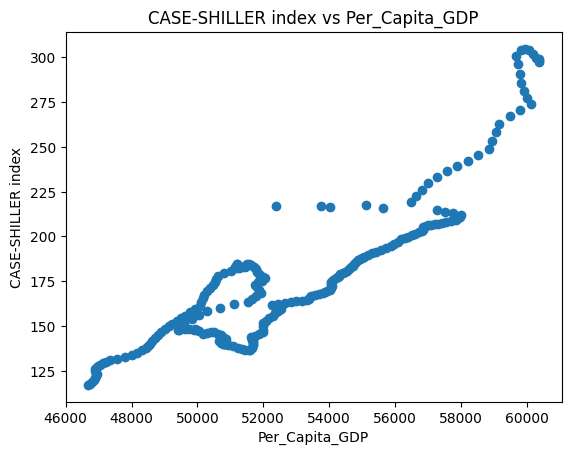

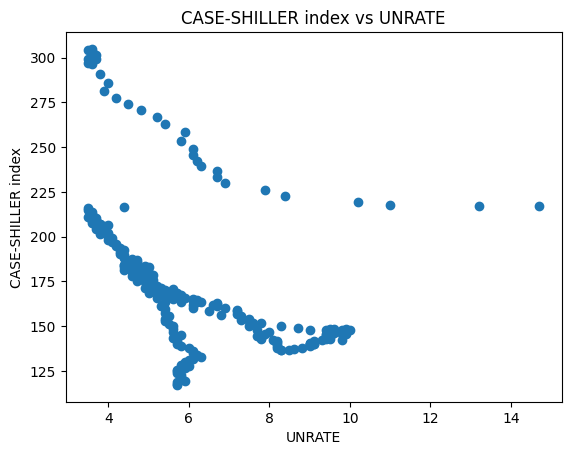

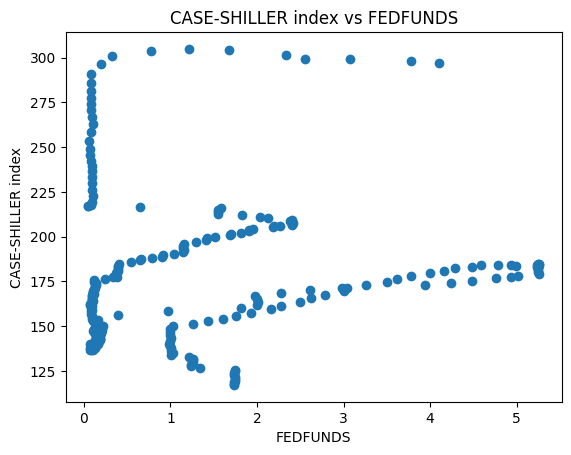

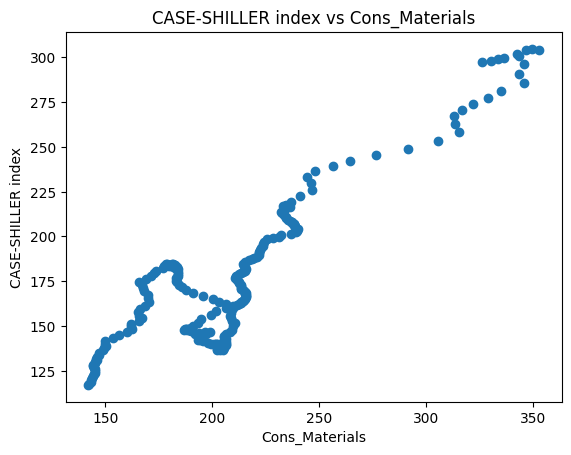

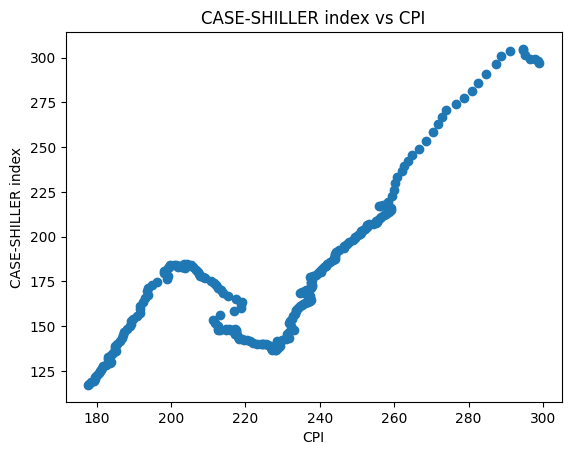

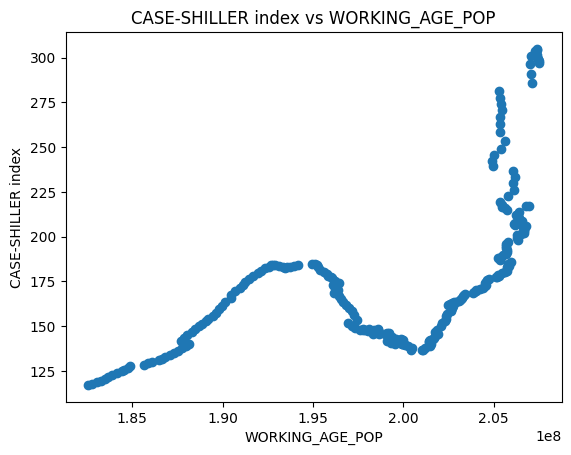

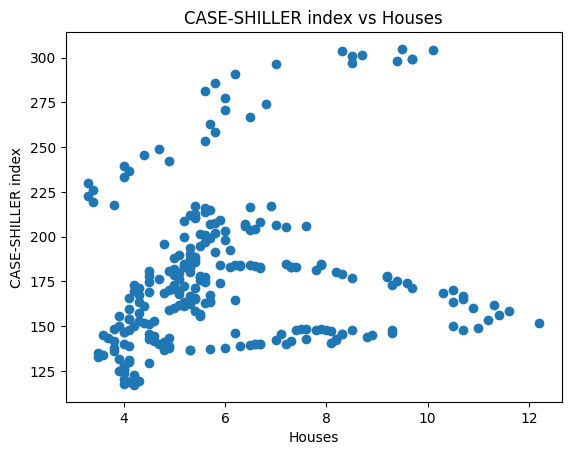

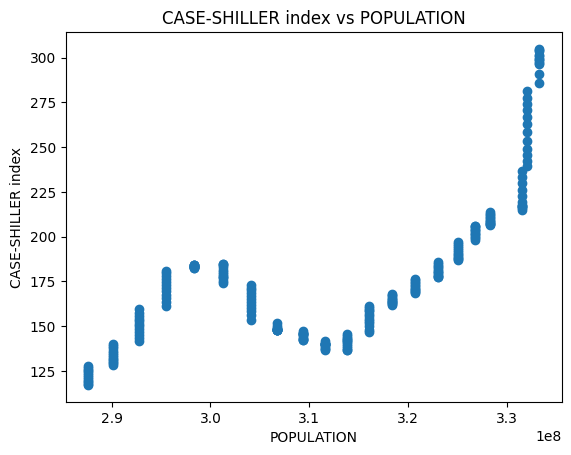

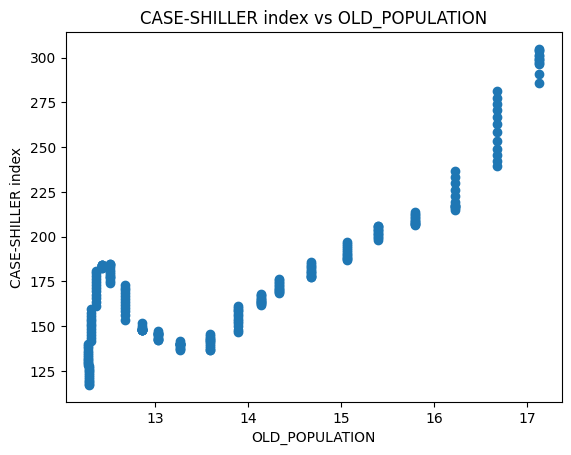

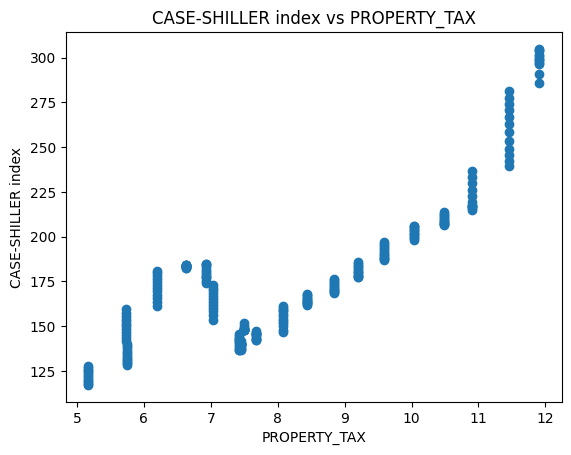

In [20]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

# From the correlation matrix and the scatter plots, the following conclusions can be made-

   1) Unemployment rate is negatively correlated with the home prices. Which makes sense.
   2) Interest rate have negative impact on influencing House prices
   3) Number of House has 0 Correlation, this is unexpected, would everyone think that number of house build would affect the house price. May be the number of houses are not enough when compare to demand

# Model Building

In [37]:
# Dropping multicollinearity columns
mult_cols = ["WORKING_AGE_POP", "CPI","OLD_POPULATION", "Cons_Materials"]
df.drop(columns = mult_cols, inplace = True)
X = df

In [38]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [39]:
#Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9063974718997846


The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [40]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 0.01358840397764559
The coefficient for UNRATE is 2.2259109136996584
The coefficient for FEDFUNDS is 1.087858994771327
The coefficient for Houses is 0.6866130440278001
The coefficient for POPULATION is -4.644919672447401e-06
The coefficient for PROPERTY_TAX is 28.814539874096187


In [41]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  656.1501851823773


 with the above analysis data we could see the high coefficient in property_tax as = 28.814, with this we can see that increase in property tax impact house price.
 
 #We can see UNRATE ( Unemployment Rate) correlation with targeted variable is negative.So it doesnt make sense that increase in unemployment rate will increase House price.
 
 #with correlation table, we could see that Per_Capita_GDP & Cons_price ( COnstruction material price ) have stood top, these factors play a vital role in house price increase.
 
 
 